In [375]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels import regression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [376]:
#load VST Ind data for a year 
data = pd.read_csv('D:/NLP Course/SMA/NESTLE Dec 2015-2020.csv')

In [377]:
data.head(3)

#WAP:weighted average price = Total value of the shares traded for an order/ Total number of shares traded for an order

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,11-Dec-20,18320.0,18457.85,18204.25,18403.0,18338.03690,5095,2058,93432298,1380,27.09,253.6,83.0
1,10-Dec-20,17567.0,18411.40,17567.00,18363.5,18097.26076,10669,3584,193079675,3367,31.56,844.4,796.5
2,9-Dec-20,17510.0,17661.00,17491.90,17561.5,17554.61657,1038,525,18221692,279,26.88,169.1,51.5


In [378]:
#data.info()

In [379]:
#Convert it to datetime from object
data['Date']= pd.to_datetime(data.Date)
data.head(1)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2020-12-11,18320.0,18457.85,18204.25,18403.0,18338.0369,5095,2058,93432298,1380,27.09,253.6,83.0


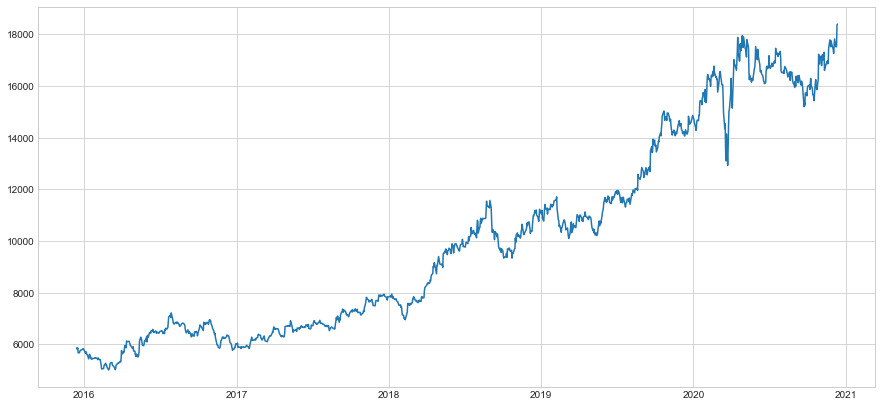

In [380]:
#data.plot(x="Date", y=["Close Price", "No.of Shares"])

# Plot the price of the asset over time
plt.figure(figsize=(15,7))
plt.plot(data['Date'],data['Close Price'])

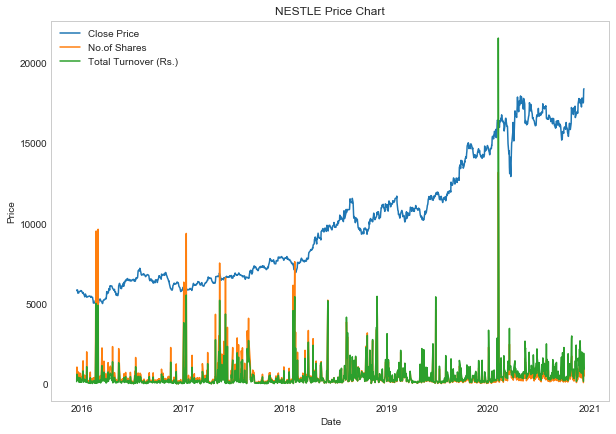

In [381]:
fig, ax = plt.subplots()

ax.plot(data['Date'],data['Close Price'],label = 'Close Price' )
ax.plot(data['Date'],data['No.of Shares']/10,label = 'No.of Shares')          #scale down by 10 for better view
ax.plot(data['Date'],data['Total Turnover (Rs.)']/100000,label = 'Total Turnover (Rs.)' ) #scale down by 1L for better view

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('NESTLE Price Chart')

fig.set_size_inches(10,7)
plt.grid()     #put grid in background
ax.legend()    #shows the legends
plt.show()

In [404]:
prices = data.copy()

close_price = prices['Close Price']
dates = close_price.index             #index the number of records 0,1,.......1237 

# Find the line of best fit to illustrate the trend
X = np.arange(len(dates))
x = sm.add_constant(X)         

model = regression.linear_model.OLS(close_price, x).fit()

# Get coefficients of line
c = model.params[0]            
m = model.params[1]

prices['Y_OLS'] = m*X + c

print(m,c)


-10.370253178598748 16496.24379613295


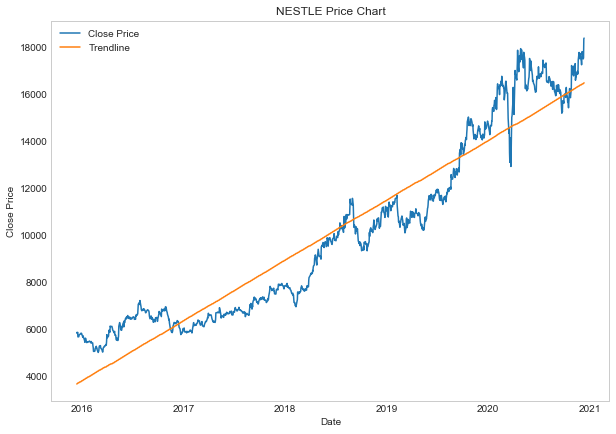

In [401]:
fig, ax = plt.subplots()

ax.plot(prices['Date'],prices['Close Price'],label = 'Close Price' )
ax.plot(prices['Date'],prices['Y_OLS'],label = 'Trendline')         

ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('NESTLE Price Chart')

fig.set_size_inches(10,7)
plt.grid()                #put grid in background
ax.legend()               #shows the legends
plt.show()

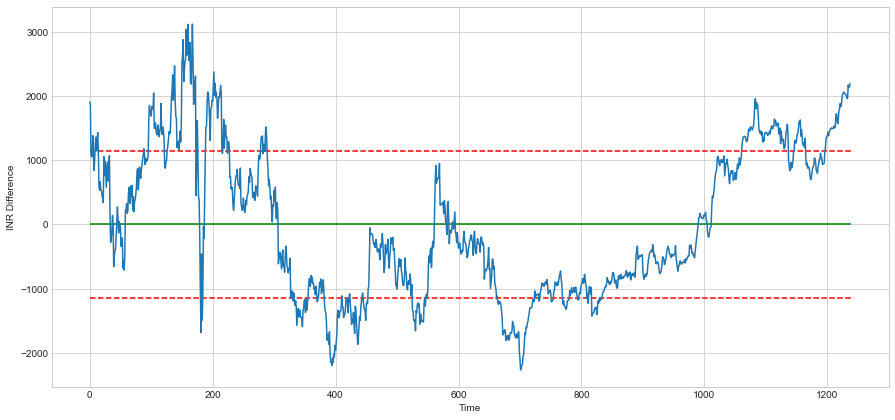

In [385]:
plt.figure(figsize=(15,7))

plt.plot((prices['Close Price'] - prices['Y_OLS']).values)

plt.hlines(np.mean(prices['Close Price'] - prices['Y_OLS']), 0, len(dates), colors='g')
plt.hlines(np.std(prices['Close Price'] - prices['Y_OLS']), 0, len(dates), colors='r', linestyles='dashed')
plt.hlines(-np.std(prices['Close Price'] - prices['Y_OLS']), 0, len(dates), colors='r', linestyles='dashed')

plt.xlabel('Time')
plt.ylabel('INR Difference')
plt.show()

In [386]:
#Dependent variable
data['Trend'] = np.where(data['Close Price'].shift(-1) > data['Close Price'],1,-1)

In [387]:
data.head(2)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Trend
0,2020-12-11,18320.0,18457.85,18204.25,18403.0,18338.03690,5095,2058,93432298,1380,27.09,253.6,83.0,-1
1,2020-12-10,17567.0,18411.40,17567.00,18363.5,18097.26076,10669,3584,193079675,3367,31.56,844.4,796.5,-1


In [388]:
#predictors
X = data[['Spread High-Low','Spread Close-Open','No.of Shares','WAP','Trend']]

In [389]:
scaler = StandardScaler()
scaler.fit(X.drop('Trend',axis=1))
sacled_features = scaler.transform(X.drop('Trend',axis=1))

X_feat = pd.DataFrame(sacled_features,columns=X.columns[:-1])

X_feat.head(3)


C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,Spread High-Low,Spread Close-Open,No.of Shares,WAP
0,0.102976,0.519939,-0.022103,2.127674
1,3.083930,4.383871,0.584464,2.065596
2,-0.323379,0.349352,-0.463589,1.925688


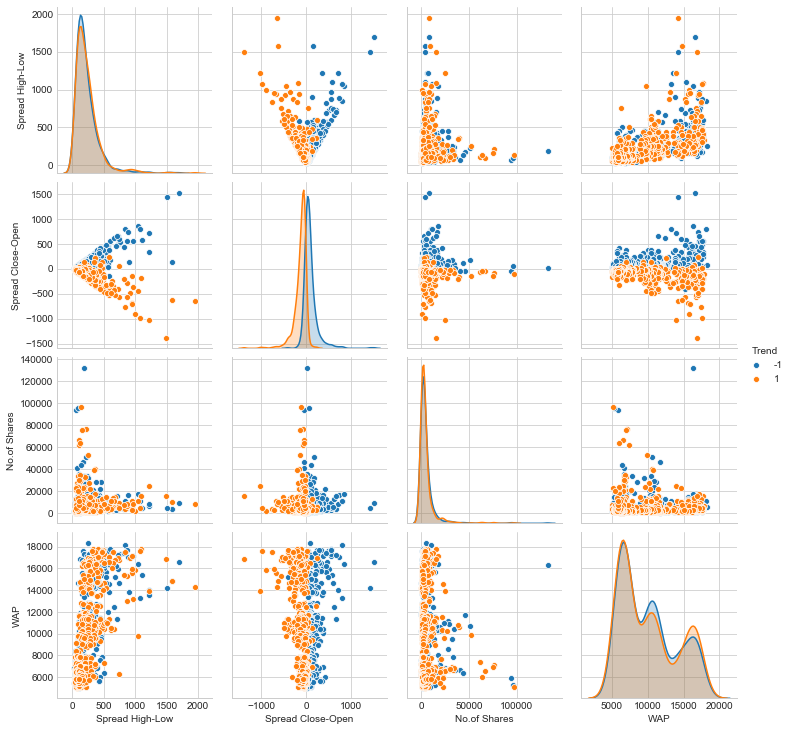

In [390]:
sns.pairplot(X, hue = 'Trend')

In [391]:
#y = f(X)
#X = data[['Spread High-Low','Spread Close-Open','No.of Shares','WAP']]
X = X_feat
y = data['Trend']

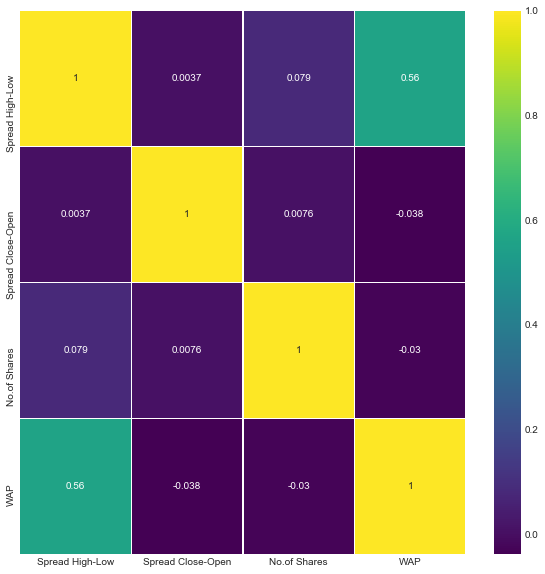

In [392]:
corremat = X.corr()
plt.figure(figsize=(10,10))
g= sns.heatmap(X.corr(),annot=True,cmap='viridis',linewidths=.5)

In [393]:
X.shape, y.shape

((1238, 4), (1238,))

In [394]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15, random_state=0)

In [395]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((1052, 4), (186, 4), (1052,), (186,))

In [396]:
svc=SVC()
svc.fit(X_train,y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test,svc.predict(X_test) )

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 89.07%
Test Accuracy: 88.17%


C:\Users\okhade\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [397]:
cls = KNeighborsClassifier(n_neighbors = 8)
cls.fit(X_train,y_train)

y_pred = cls.predict(X_test)

accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test,cls.predict(X_test) )

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 88.69%
Test Accuracy: 85.48%


In [398]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("\n Classification Report:",)
print (result1)

Confusion Matrix:
[[86 13]
 [14 73]]

 Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.87      0.86        99
           1       0.85      0.84      0.84        87

   micro avg       0.85      0.85      0.85       186
   macro avg       0.85      0.85      0.85       186
weighted avg       0.85      0.85      0.85       186



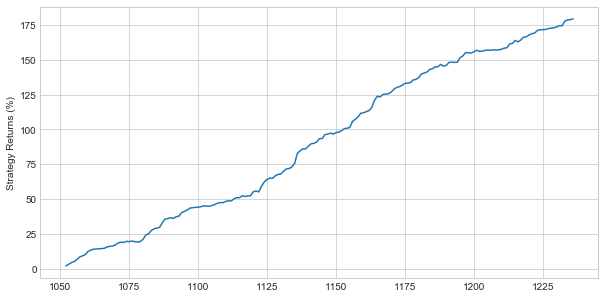

In [399]:
split_percentage = 0.85
split = int(split_percentage*len(data))

data['Predicted_Signal'] = cls.predict(X)

# Calculate log returns
data['Return'] = np.log(data['Close Price'].shift(-1) / data['Close Price'])*100
data['Strategy_Return'] = data.Return * data.Predicted_Signal

data.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))

plt.ylabel("Strategy Returns (%)")
plt.show()